# Datasets
## Data Gathering Tools
### Hate Sonar
  HateSonar is a Python Library used mainly for the detection of hate speech. Created by Hiroki Nakayama, this library consists of a trained model aimed to recognize hate speech and offensive language.[1] The model used is a Bidirectional Encoder Representations from Transformers (BERT)-based model, which is a neural network-based technique for natural language processing. The library works by classifying a string of text as either hate speech, offensive language, or neither of the two. The classes outputted are measured based on confidence values. The BERT model was built using a Python library used for deep learning and machine learning models called ktrain.

### Twitch chat scraper
The twitch chat scraper is a javascript library written by Martin Giger. The library is built for extracting the chat log of a Twitch stream through Twitch’s Video on Demand (VOD) service. It works by passing a stream id as the parameter and default it gathers the first 10 minutes of the stream’s chat. It compiles the chat log into a single text file the duration of the chat specific by the command.[2]


## Data Processing
  Using the Twitch scraper, the group was able to gather chat logs from 8 gaming streamers, 4 of which implements chat rules and the other 4 which does not, by using the twitch scraper. The group was able to gather around 3300 chat logs, 1719 are with rules and 1628 without rules. The four streamers with chat  rules the group got are Ninja, TimTheTatMan,  MOONMOON, and GeekandSundry. The four streamers without rules the group got are Shroud, DrLupo, Summit1g, and LIRIK.

  In order to retrieve the chat logs from each streamer, the group first used the Twitch API.  The process first involved retrieving the ids of the streams available, at least 1000 per streamer. After acquiring the ids, each id is run through a npm library called “twitch-chatlog”. This library fetches the chatlog given the stream id. The default command of this library fetches the first 10 minutes of the stream chat. As a result, some chat logs contained no chat, thus were removed from the dataset. In each chat log, each line has a format of [timestamp] <username> message.

    
# Visual
  For the visuals, the group used 

```
import wordcloud
import panda
import matplotlib.pyplot as plt
```
for visualizing the data. Word clouds were mainly use to visualize the frequency of the words. While matplot and panda were used to graphically show the data.


# Sources
[1]. H. Nakayama, “Hironsan/HateSonar,” GitHub. [Online]. Available: https://github.com/Hironsan/HateSonar. [Accessed: 29-Sep-2020]. 

[2]. npm. 2020. Twitch-Chatlog. [online] Available at: <https://www.npmjs.com/package/twitch-chatlog> [Accessed 26 September 2020].

## Imports and Functions


In [ ]:
import pandas as pd
import spacy
import numpy as np
import wordcloud
import re
import string
import matplotlib.pyplot as plt
import nltk

from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
def change_label(label):
    if label == "offensive_language":
        return 1
    elif label == "hate_speech":
        return 1
    else:
        return 0
def lower_case(text):
  return str(text.lower())
def wordcloud(df, label):
    # Print only rows where the toxic category label value is 1 
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(str(text)))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequent in the data", fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

## For Whole Data

### Whole data No Rules

Opening the data set from google drive and showing the last 5 entries.

In [ ]:
dfNR = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DATASCI/project/withoutrules/WithoutRules.csv')
dfNR.tail()

text  ...   neither
1873768                                        LOL  ...  0.491065
1873769                                   god damn  ...  0.043885
1873770  racism in america definitely isnt done :/  ...  0.587489
1873771                              inb4 loss LUL  ...  0.630171
1873772                                        WTF  ...  0.166007

[5 rows x 5 columns]

Show dataframe and check the data types of each column

In [ ]:
dfNR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873773 entries, 0 to 1873772
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   text                object 
 1   top_class           object 
 2   hate_speech         float64
 3   offensive_language  float64
 4   neither             float64
dtypes: float64(3), object(2)
memory usage: 71.5+ MB


Remove unecessary columns for this study such as the computation for 'neither', 'hate_speech', and 'offensive_language'. Afterwards, we classify it to binary, 0 for 'neither' and 1 for 'hate_speech' and 'offensive_language'.

In [ ]:
#Drop unecessary columns
dfNR =dfNR.drop(["hate_speech", "offensive_language", "neither"], axis=1)
#Make top_class binary as toxic(1) or not toxic(0)
dfNR['toxic'] = dfNR['top_class'].apply(lambda x: change_label(x))
#convert text to string type
dfNR['text'] = dfNR['text'].astype(str)

In [ ]:
dfNR.tail()

text           top_class  toxic
1873768                                        LOL             neither      0
1873769                                   god damn  offensive_language      1
1873770  racism in america definitely isnt done :/             neither      0
1873771                              inb4 loss LUL             neither      0
1873772                                        WTF  offensive_language      1

Showing the ammount of toxic and non-toxic speeches. Fortunately or unfortunately, there are only a little toxic speech inside the data gathered.

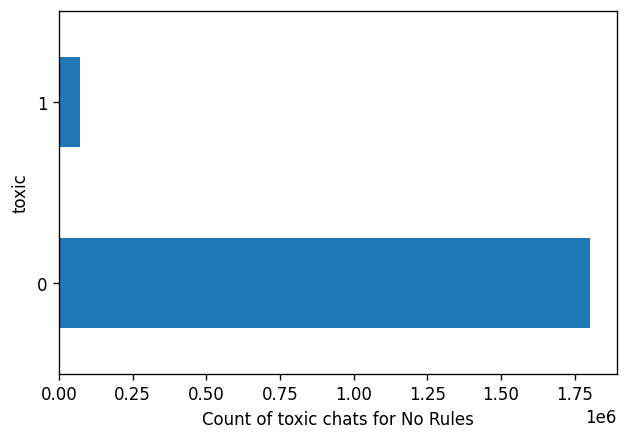

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
dfNR.groupby('toxic')['toxic'].count().plot(kind='barh', ax=ax)
ax.set_xlabel('Count of toxic chats for No Rules');

In [ ]:
dfNR['text']=dfNR['text'].apply(lambda x: lower_case(x))
dfNR.tail()

text           top_class  toxic
1873768                                        lol             neither      0
1873769                                   god damn  offensive_language      1
1873770  racism in america definitely isnt done :/             neither      0
1873771                              inb4 loss lul             neither      0
1873772                                        wtf  offensive_language      1

So for the next section we visualized using wordcloud the toxic chats without pre-processing such as removing stop words, emotes, and streamer names.

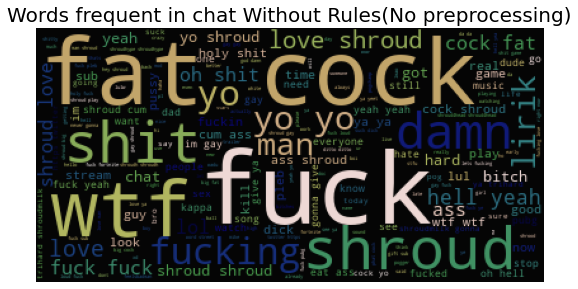

In [ ]:
subset=dfNR[dfNR['toxic']==1]
text = subset.text.values
wordcloud = WordCloud().generate(' '.join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in chat Without Rules(No preprocessing)", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

After visualizing the data with no pre-processing, in this step we removed stop words as well as emotes and streamer names. Additionally, we made it lowercased.

In [ ]:
subsetNR=dfNR[dfNR['toxic']==1]
textNR=subsetNR['text'].values
textNR = ' '.join([str(elem) for elem in text])
#remove non words such as punctuation
textNR=re.sub(pattern = "[^\w\s]", repl = "", string = textNR)
#remove emotes
textNR=re.sub(pattern = "(ninja)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(gands)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(twitch)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(vote)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(courage)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(sean)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(high)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(beat)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(tat)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(shroud)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(lupo)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(lirik)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(drlupo)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(summit1g)\w+", repl = "", string = textNR)


textNR=re.sub(pattern = "(\s\s+)", repl = " ", string = textNR)
print(textNR)

N i c k l i k e s t o p l a y f o o t b a l l h o w e v e r h e i s n o t t o o f o n d o f t e n n i s 


In [ ]:
text_tokens = word_tokenize(textNR)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

['shax', 'always', 'talks', 'shit', 'doesnt', 'fight', 'shax', 'talks', 'shit', 'lose', 'iamnotscottish', 'guy', 'comes', 'party', 'says', 'holy', 'shit', 'dr', 'lupo', 'lol', 'drlupo', 'I', 'dont', 'know', 'I', 'missed', 'ass', 'I', 'miss', 'Rambo', 'Headsnipe01', 'AVICII', 'RICK', 'ASTLEY', 'Never', 'Gon', 'Wake', 'You', 'Up', 'NilsOfficial', 'Mashup', 'nilsofficial', 'current', 'song', 'It', 'requested', 'Lord_cthulhu0220', 'httpsyoutubeoT3mCybbhf0', 'shit', 'DrLupo', 'sneaky', 'snek', 'lupo', 'id', 'love', 'run', 'sometime', 'playd', 'like', '5', 'times', 'haha', 'lupo', 'fucking', 'sneaky', 'tonight', 'lmao', 'D0cR3d', 'AVICII', 'RICK', 'ASTLEY', 'Never', 'Gon', 'Wake', 'You', 'Up', 'NilsOfficial', 'Mashup', 'nilsofficial', 'current', 'song', 'It', 'requested', 'Lord_cthulhu0220', 'httpsyoutubeoT3mCybbhf0', 'hate', 'damn', 'dude', 'bad', 'lol', 'haha', 'looks', 'funny', 'damn', 'reload', 'holy', 'fuck', 'Damn', 'I', 'love', 'sweet', 'casserole', 'ozekken', 'lupoLOVE', 'ggs', 'Lmao

In [ ]:
textNR = ' '.join([str(elem) for elem in tokens_without_sw])
textNR=textNR.lower()
textNR

'shax always talks shit doesnt fight shax talks shit lose iamnotscottish guy comes party says holy shit dr lupo lol drlupo i dont know i missed ass i miss rambo headsnipe01 avicii rick astley never gon wake you up nilsofficial mashup nilsofficial current song it requested lord_cthulhu0220 httpsyoutubeot3mcybbhf0 shit drlupo sneaky snek lupo id love run sometime playd like 5 times haha lupo fucking sneaky tonight lmao d0cr3d avicii rick astley never gon wake you up nilsofficial mashup nilsofficial current song it requested lord_cthulhu0220 httpsyoutubeot3mcybbhf0 hate damn dude bad lol haha looks funny damn reload holy fuck damn i love sweet casserole ozekken lupolove ggs lmao didnt shit damn fine stuff sir drlupo lets fucking go fuckin love bro hahahahhahaha damn itstaylortime hiiiii lupo stop xd yo lupohype lupo we 3 lupo sr mood love youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove drlupo you need some tripmines in your life sr m

Removing more emotes that were not found in the first removal.

In [ ]:
#remove emotes
textNR=re.sub(pattern = "(ninja)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(gands)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(twitch)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(vote)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(courage)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(sean)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(high)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(beat)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(tat)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(timthetat)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(shroud)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(lupo)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(lirik)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(drlupo)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(summit1g)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(pog)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(kek)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(\s\s+)", repl = " ", string = textNR)


textNR

'shax always talks shit doesnt fight shax talks shit lose iamnotscottish guy comes party says holy shit dr lol dr i dont know i missed ass i miss rambo headsnipe01 avicii rick astley never gon wake you up nilsofficial mashup nilsofficial current song it requested lord_cthulhu0220 httpsyoutubeot3mcybbhf0 shit dr sneaky snek id love run sometime playd like 5 times haha fucking sneaky tonight lmao d0cr3d avicii rick astley never gon wake you up nilsofficial mashup nilsofficial current song it requested lord_cthulhu0220 httpsyoutubeot3mcybbhf0 hate damn dude bad lol haha looks funny damn reload holy fuck damn i love sweet casserole ozekken ggs lmao didnt shit damn fine stuff sir dr lets fucking go fuckin love bro hahahahhahaha damn itstaylortime hiiiii stop xd yo we 3 sr mood love youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove youlove dr you need some tripmines in your life sr mood mai7viac you should fix that raffle fuck game fuck trials ka

So in this step, we added the words individually into a dataframe as well as their occurences.

In [ ]:
wordsNR=textNR.split(' ')
wordsNR=dict(Counter(wordsNR))
wordsNR=pd.DataFrame.from_dict(wordsNR, orient='index').reset_index()
wordsNR.columns=['text','count']
wordsNR =wordsNR.sort_values(by=['count'],ascending=False)
wordsNR

text  count
61           fuck  10323
3            shit   5618
749          cock   5539
189           wtf   5472
15              i   5057
...           ...    ...
9674       diddle      1
9675   itsleesha_      1
9676        fills      1
9677         csgi      1
19775      thrown      1

[19776 rows x 2 columns]

We then show the top 50 toxic words for chats with no rules.

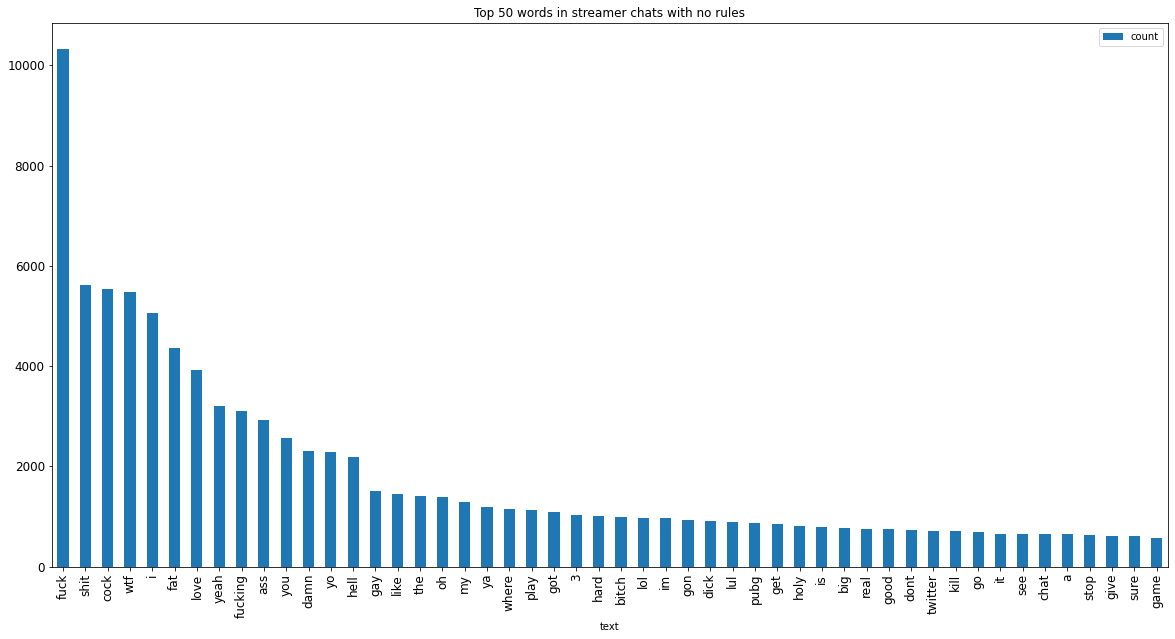

In [ ]:
top50 = wordsNR.head(50)
top50.plot.bar(x="text",y="count",figsize=(20,10),fontsize='large', title= 'Top 50 words in streamer chats with no rules')

Wordcloud for top 50 words frequent in the streamer chats with no rules after pre-processing, we can see that names such as 'shroud' were removed.

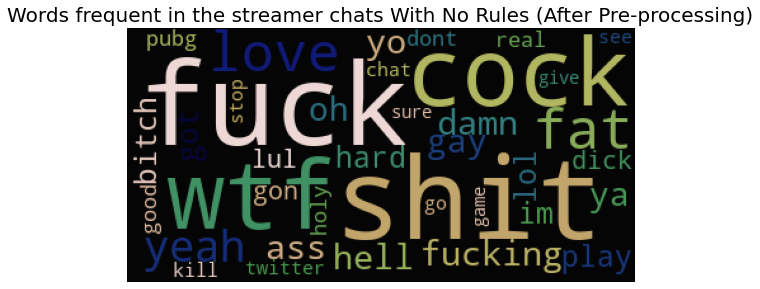

In [ ]:
text = top50['text'].values

wordcloud = WordCloud().generate(' '.join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the streamer chats With No Rules (After Pre-processing)", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In this part we just download the toxic words that we found, which can be used by others in their experimentation.

In [ ]:
wordsNR.to_csv('WithoutRulesFinal.csv',index=False)

### Whole data With Rules

We read the csv file from google drive.

In [ ]:
dfWR = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DATASCI/project/withrules/WithRules.csv')
dfWR.tail()

text  ...   neither
1311972                                         I WAS HERE  ...  0.584512
1311973                                    Downtime forver  ...  0.630171
1311974                               I want my money back  ...  0.537517
1311975  no game to update KEKW no game to update KEKW ...  ...  0.658390
1311976  Streamers are in on this it is a new update bo...  ...  0.707890

[5 rows x 5 columns]

We checked to see the data types of each columns as well as see if there are null values included in the data set.

In [ ]:
dfWR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311977 entries, 0 to 1311976
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   text                1311977 non-null  object 
 1   top_class           1311977 non-null  object 
 2   hate_speech         1311977 non-null  float64
 3   offensive_language  1311977 non-null  float64
 4   neither             1311977 non-null  float64
dtypes: float64(3), object(2)
memory usage: 50.0+ MB


Just like in data with no rules, we remove the other columns that are not necessary for this project, and convert the 'top_class' into binary.

In [ ]:
#Drop unecessary columns
dfWR =dfWR.drop(["hate_speech", "offensive_language", "neither"], axis=1)
#Make top_class binary as toxic(1) or not toxic(0)
dfWR['toxic'] = dfWR['top_class'].apply(lambda x: change_label(x))
#convert text to string type
dfWR['text'] = dfWR['text'].astype(str)

In [ ]:
dfWR.tail()

text top_class  toxic
1311972                                         I WAS HERE   neither      0
1311973                                    Downtime forver   neither      0
1311974                               I want my money back   neither      0
1311975  no game to update KEKW no game to update KEKW ...   neither      0
1311976  Streamers are in on this it is a new update bo...   neither      0

Check to se the percentage of the toxic and non-toxic words. Just like the chat for no rules, there are way fewer toxic chats than non-toxic chats.

In [ ]:
dfWR['toxic'].value_counts(normalize=True)

0    0.966497
1    0.033503
Name: toxic, dtype: float64

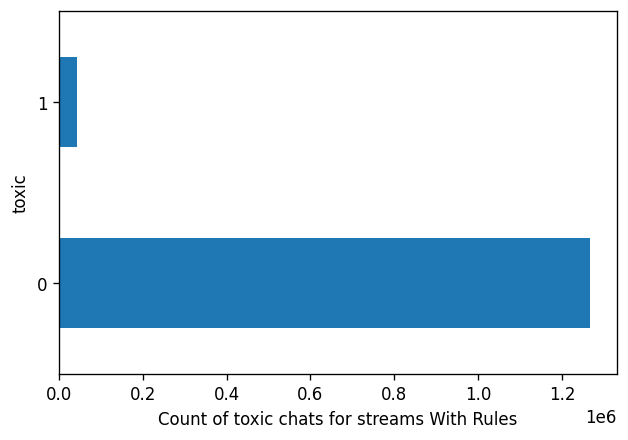

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
dfWR.groupby('toxic')['toxic'].count().plot(kind='barh', ax=ax)
ax.set_xlabel('Count of toxic chats for streams With Rules');

In [ ]:
dfWR['text']=dfWR['text'].apply(lambda x: lower_case(x))
dfWR.tail()

text top_class  toxic
1311972                                         i was here   neither      0
1311973                                    downtime forver   neither      0
1311974                               i want my money back   neither      0
1311975  no game to update kekw no game to update kekw ...   neither      0
1311976  streamers are in on this it is a new update bo...   neither      0

So in here we could see the words frequent in toxic chats for streamers who has rules before pre-processing. As we can see there area stop words, and streamer names such as "ninja"

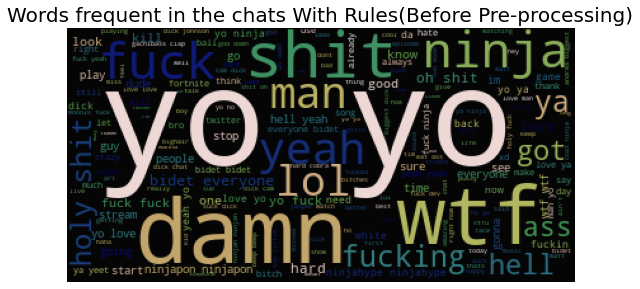

In [ ]:
subset=dfWR[dfWR['toxic']==1]
text = subset.text.values
wordcloud = WordCloud().generate(' '.join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the chats With Rules(Before Pre-processing)", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

We then removed all the non words such as punctuations, and remove the emotes as well as the stop words inside the data set.

In [ ]:
subsetWR=dfWR[dfNR['toxic']==1]
textWR=subsetWR['text'].values
textWR = ' '.join([str(elem) for elem in text])
#remove non words such as punctuation
textWR=re.sub(pattern = "[^\w\s]", repl = "", string = textWR)
#remove emotes preliminary
textWR=re.sub(pattern = "(cerulean)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(geekand)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(moon)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(ninja)\w+", repl = "", string = textWR)

textWR=re.sub(pattern = "(\s\s+)", repl = " ", string = textWR)
textWR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


'that scared the out of me damn my speakers were on high holy hell how many viewers are in this welcome once you pop that top you cant stop before i cant talk because im not a sub i just wanted to say i love you all love to all critters gandslessthanthree catvelcro sure sure rub it in i want to see her get that armor this is buffering like crazy bidet all bidet from hard rock country its fukin time hell yeah so bidet all does everyone else have a loading screen kill the music ya yeah 3 ashley 3 hell yes wolfgar83 sure is kill the music wtf is going on sam you are a god how long have they been doing this show and they cant get the damn settings standardized jesus lmao wtf the hell wtf what the hell man you can tell they all need this samwhat is this shit xd if mercer doesnt end with high noonso much disappointment lol honestly could use more of marisha talking about her rear end damn holy shit gandsscanlan gandsscanlan i just what the helldammit sam good job hahahaha i havent laughed th

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
text_tokens = word_tokenize(textWR)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

['scared', 'damn', 'speakers', 'high', 'holy', 'hell', 'many', 'viewers', 'welcome', 'pop', 'top', 'cant', 'stop', 'cant', 'talk', 'wanted', 'say', 'love', 'love', 'critters', 'gandslessthanthree', 'catvelcro', 'sure', 'sure', 'rub', 'see', 'get', 'armor', 'buffering', 'like', 'crazy', 'bidet', 'bidet', 'hard', 'rock', 'country', 'fukin', 'time', 'hell', 'yeah', 'bidet', 'everyone', 'else', 'loading', 'screen', 'kill', 'music', 'yeah', '3', 'ashley', '3', 'hell', 'yes', 'wolfgar83', 'sure', 'kill', 'music', 'wtf', 'going', 'sam', 'god', 'long', 'show', 'cant', 'get', 'damn', 'settings', 'standardized', 'jesus', 'lmao', 'wtf', 'hell', 'wtf', 'hell', 'tell', 'need', 'samwhat', 'shit', 'xd', 'mercer', 'doesnt', 'high', 'noonso', 'much', 'disappointment', 'lol', 'honestly', 'could', 'use', 'marisha', 'talking', 'rear', 'damn', 'holy', 'shit', 'gandsscanlan', 'gandsscanlan', 'helldammit', 'sam', 'good', 'job', 'hahahaha', 'havent', 'laughed', 'hard', 'since', 'vox', 'moochina', 'sam', 'damn

In [ ]:
textWR = ' '.join([str(elem) for elem in tokens_without_sw])
# textWR=textNR.lower()
textWR

'scared damn speakers high holy hell many viewers welcome pop top cant stop cant talk wanted say love love critters gandslessthanthree catvelcro sure sure rub see get armor buffering like crazy bidet bidet hard rock country fukin time hell yeah bidet everyone else loading screen kill music yeah 3 ashley 3 hell yes wolfgar83 sure kill music wtf going sam god long show cant get damn settings standardized jesus lmao wtf hell wtf hell tell need samwhat shit xd mercer doesnt high noonso much disappointment lol honestly could use marisha talking rear damn holy shit gandsscanlan gandsscanlan helldammit sam good job hahahaha havent laughed hard since vox moochina sam damn genius wtf xd love much hell watch loot crate damn thats soo impressive rearend sam fuckin gandsscanlan gandsscanlan gandsscanlan gandsscanlan lol wit kill brog really wish sony would fix shitty streaming issues could watch playstation instead phone wtf alpha guess super hard figure yall need jesus youve got devil broadcastin

In [ ]:
#Remove Eomtes post nltk
textWR=re.sub(pattern = "(cerulean)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(geekand)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(moon)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(ninja)\w+", repl = "", string = textWR)
textWR=re.sub(pattern = "(\s\s+)", repl = " ", string = textWR)
textWR

'scared damn speakers high holy hell many viewers welcome pop top cant stop cant talk wanted say love love critters gandslessthanthree catvelcro sure sure rub see get armor buffering like crazy bidet bidet hard rock country fukin time hell yeah bidet everyone else loading screen kill music yeah 3 ashley 3 hell yes wolfgar83 sure kill music wtf going sam god long show cant get damn settings standardized jesus lmao wtf hell wtf hell tell need samwhat shit xd mercer doesnt high noonso much disappointment lol honestly could use marisha talking rear damn holy shit gandsscanlan gandsscanlan helldammit sam good job hahahaha havent laughed hard since vox moochina sam damn genius wtf xd love much hell watch loot crate damn thats soo impressive rearend sam fuckin gandsscanlan gandsscanlan gandsscanlan gandsscanlan lol wit kill brog really wish sony would fix shitty streaming issues could watch playstation instead phone wtf alpha guess super hard figure yall need jesus youve got devil broadcastin

We then counted and saved the frequent toxic words that occured inside the chat with rules.

In [ ]:
wordsWR=textWR.split(' ')
wordsWR=dict(Counter(wordsWR))
wordsWR=pd.DataFrame.from_dict(wordsWR, orient='index').reset_index()
wordsWR.columns=['text','count']
wordsWR =wordsWR.sort_values(by=['count'],ascending=False)
wordsWR

text  count
619         fuck   3524
58          shit   3108
45           wtf   2192
16          love   2188
1           damn   2159
...          ...    ...
7861     slavers      1
7862   missandes      1
7863     trusted      1
7866      denied      1
16052     cherck      1

[16053 rows x 2 columns]

We then show the top 50 words as well as the ammount they were typed in chats with rules after pre-processing.

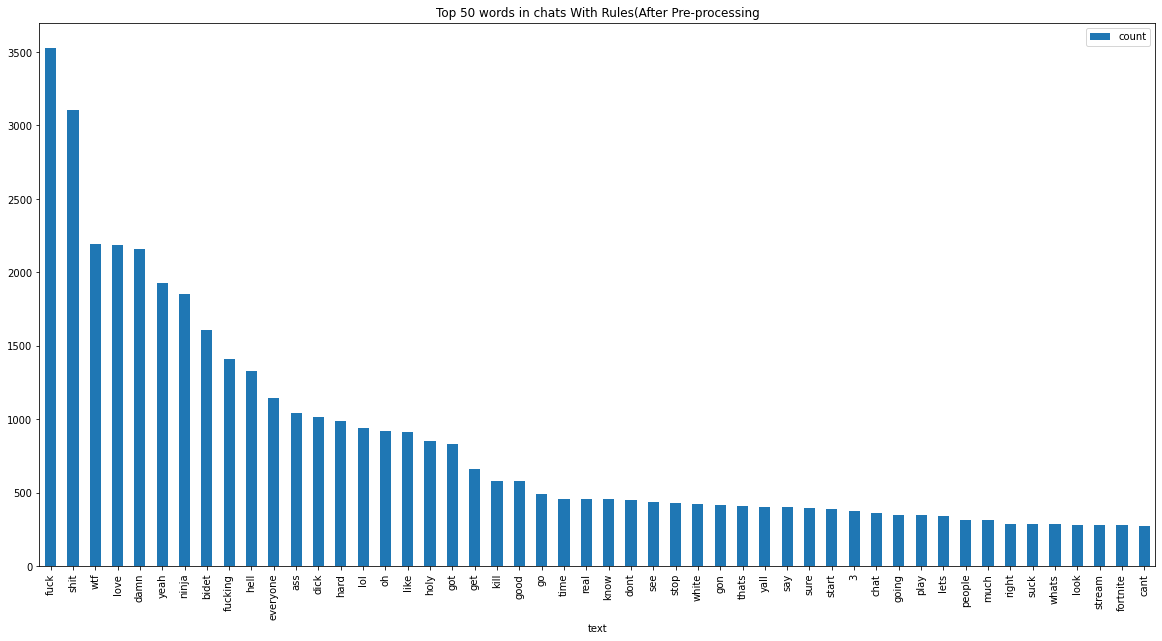

In [ ]:
top50 = wordsWR.head(50)
top50.plot.bar(x="text",y="count",figsize=(20,10),title="Top 50 words in chats With Rules(After Pre-processing")

In here we show a wordcloud of the toxic words frequent in streamers with chat rules after the pre-processing, we can see that there are no more stop words and emotes.

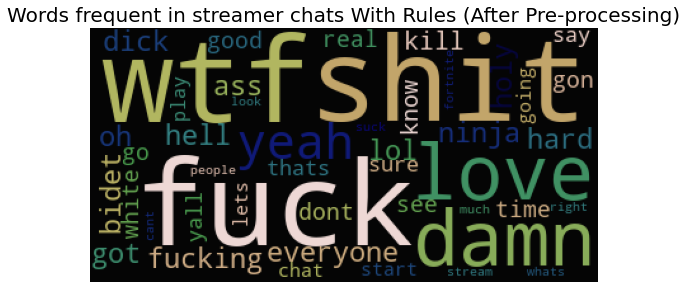

In [ ]:
text = top50['text'].values

wordcloud = WordCloud().generate(' '.join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in streamer chats With Rules (After Pre-processing)", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

Like the no rules, we then save the words themselves into a csv file for future experimentations.

In [ ]:
wordsWR.to_csv('WithRulesFinal.csv',index=False)

### Merge similar in both With and No rules

In [ ]:
print(wordsNR.shape)
print(wordsWR.shape)

(19776, 2)
(16053, 2)


After processing both individually. We then merged the words that exists in both with and without chat rules.

In [ ]:
mergedf=pd.merge(wordsNR,wordsWR,on='text')

In [ ]:
mergedf.columns=['text','NoRules','WithRules']
mergedf

text  NoRules  WithRules
0          fuck    10323       3524
1          shit     5618       3108
2          cock     5539          3
3           wtf     5472       2192
4           fat     4362         39
...         ...      ...        ...
5753      holyy        1          1
5754      blink        1          2
5755  carlsmile        1          1
5756        iit        1          1
5757      fills        1          1

[5758 rows x 3 columns]

We then visualize the merged words into a wordcloud.

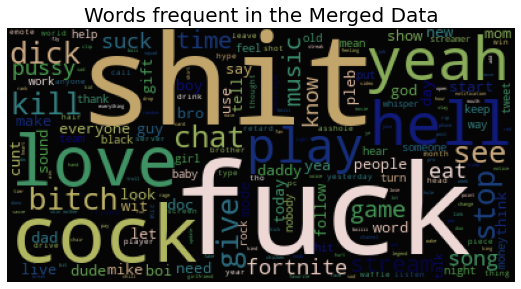

In [ ]:
text = mergedf['text'].values
wordcloud = WordCloud().generate(' '.join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the Merged Data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

We then get the top 20 words to compare the differences between the frequency they were typed. Based on this, we can conclude that the ammount of toxic words streamers receive are almost the same but for the quantity, having chat rules can significantly decrease the quantity of toxic words they receive when compared to streamers with rules.

In [ ]:
top20 = mergedf.head(50)
top20.head()

text  NoRules  WithRules
0  fuck    10323       3524
1  shit     5618       3108
2  cock     5539          3
3   wtf     5472       2192
4   fat     4362         39

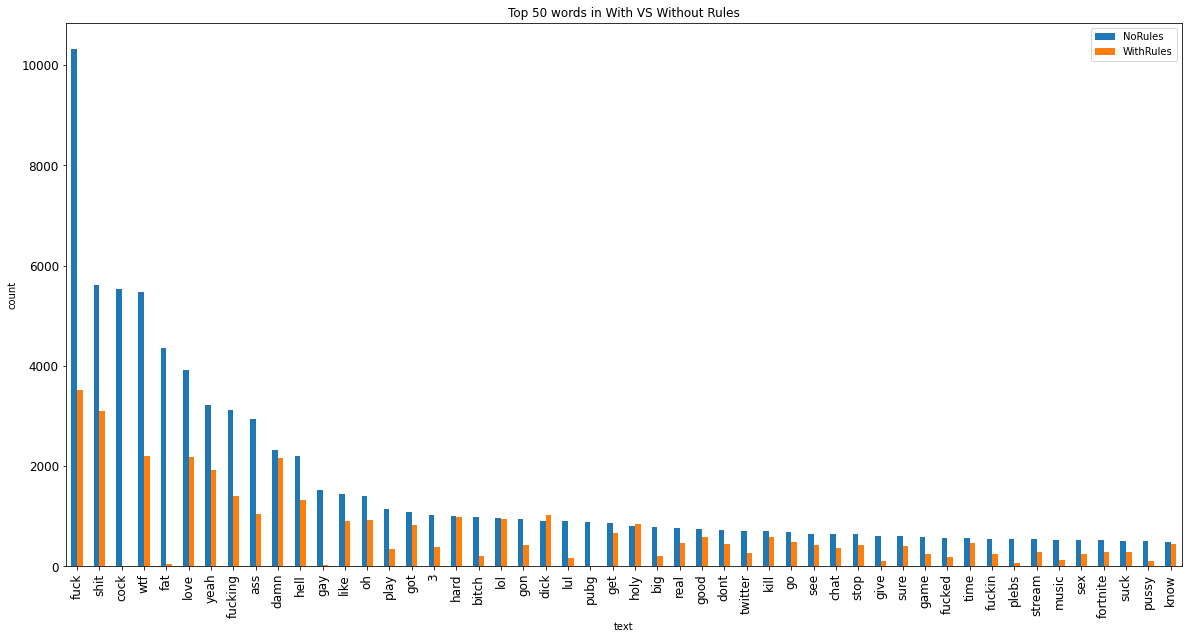

In [ ]:
top20.plot.bar(x='text',ylabel="count", fontsize='large',figsize=(20,10),title="Top 50 words in With VS Without Rules")

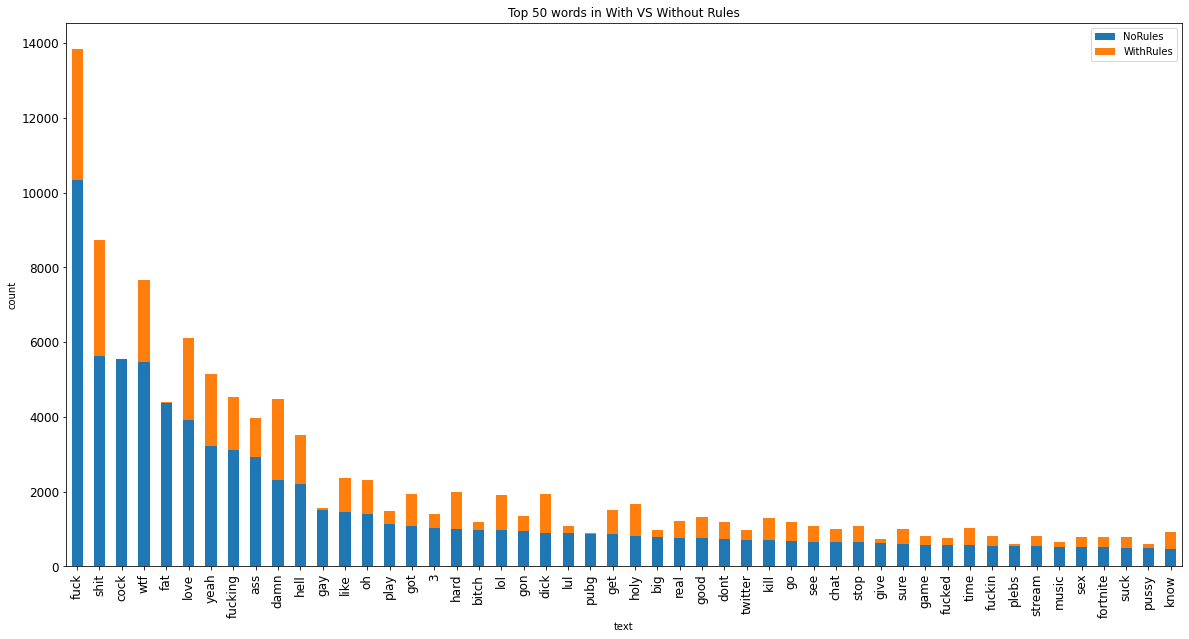

In [ ]:
top20.plot.bar(x='text',ylabel="count", stacked=True,fontsize='large',figsize=(20,10),title="Top 50 words in With VS Without Rules")


We then convert the dataframe into csv which can be used for future experiments.

In [ ]:
mergedf.to_csv('SimilarWords.csv',index=False)

In [ ]:
temp = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DATASCI/project/SimilarWords.csv')
temp.head()

text  NoRules  WithRules
0  fuck    10323       3524
1  shit     5618       3108
2  cock     5539          3
3   wtf     5472       2192
4   fat     4362         39

## For Randomized Data

### WR stands for with rules

In [ ]:
dfWR = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DATASCI/project/withrules.csv')
dfWR.tail()

Unnamed: 0  ...   neither
9995        9995  ...  0.599660
9996        9996  ...  0.432786
9997        9997  ...  0.579916
9998        9998  ...  0.621796
9999        9999  ...  0.630171

[5 rows x 6 columns]

In [ ]:
dfWR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   text                10000 non-null  object 
 2   top_class           10000 non-null  object 
 3   hate_speech         10000 non-null  float64
 4   offensive_language  10000 non-null  float64
 5   neither             10000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 468.9+ KB


In [ ]:
#Drop unecessary columns
dfWR = dfWR.drop(["Unnamed: 0","hate_speech", "offensive_language", "neither"], axis=1)
#Make top_class binary as toxic(1) or not toxic(0)
dfWR['toxic'] = dfWR['top_class'].apply(lambda x: change_label(x))
#convert text to string type
dfWR['text'] = dfWR['text'].astype(str)

### Toxic Chats in streamers who impose rules

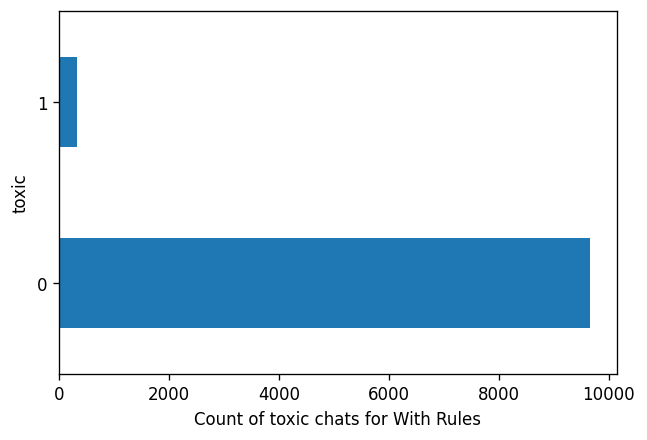

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
dfWR.groupby('toxic')['toxic'].count().plot(kind='barh', ax=ax)
ax.set_xlabel('Count of toxic chats for With Rules');

In [ ]:
dfWR['text']=dfWR['text'].apply(lambda x: lower_case(x))

In [ ]:
dfWR.tail()

text           top_class  toxic
9995                       it will not load up             neither      0
9996                                        yo  offensive_language      1
9997  maybe you have to exit to get the update             neither      0
9998                         what is happening             neither      0
9999                                       ...             neither      0

In [ ]:
# Initialize Spacy Model
nlp = spacy.load("en_core_web_sm")
# Parse the text using the Spacy model
dfWR['text'] = dfWR['text'].apply(lambda comment: nlp(comment))

In [ ]:
dfWR.tail()

text  ... toxic
9995                          (it, will, not, load, up)  ...     0
9996                                               (yo)  ...     1
9997  (maybe, you, have, to, exit, to, get, the, upd...  ...     0
9998                              (what, is, happening)  ...     0
9999                                              (...)  ...     0

[5 rows x 3 columns]

### Visualization

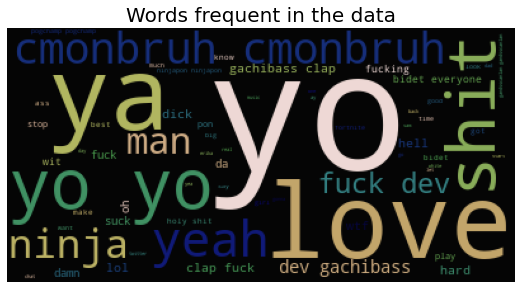

In [ ]:
subset=dfWR[dfWR['toxic']==1]
text = subset.text.values
wordcloud = WordCloud().generate(str(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [ ]:
subsetWR=dfWR[dfWR['toxic']==1]
textWR=subsetWR['text'].values
textWR = ' '.join([str(elem) for elem in text])
textWR=re.sub(pattern = "[^\w\s]", repl = "", string = textWR)
textWR=re.sub(pattern = "(\s\s)", repl = " ", string = textWR)
textWR

'so much chat aint nobody can read that fast beep beep yall samriegel this is on you biblethump its time to kill that stupid dragon lol bidet everyone bidet all no sound her either but theyll get it hey everyone i just want you all to know that i love you all this is insanity they are on time holy shit ya i have to go line up infront of gamestop soon for the switch holy shit gandsscanlan gandsscanlan gandsscanlan gandsscanlan theyre in hell its dark no pike no sam theyd better not take hell beep beep all whats up everyone columbiasc lol wtf sam the golden girls oh yeah bidet all lag wtf all the theories bidet to all my fellow arizonans this is critical role where a bunch of nerdy ass voice actors play dungeons and dragons all my georgia critters say hell yeah marisha is wearing sleeves thats bull shit sleeves are so bullshit who who is the white girl damn sam shit going down so happy to have her here im so nervious that is how you do sponsorship holy shit hell yeah do they get to use t

In [ ]:
wordsWR=textWR.split(' ')
wordsWR=dict(Counter(wordsWR))
wordsWR=pd.DataFrame.from_dict(wordsWR, orient='index').reset_index()
wordsWR.columns=['text','count']
wordsWR =wordsWR.sort_values(by=['count'],ascending=False)
wordsWR

text  count
15           you     71
348           yo     64
36             i     37
78            my     32
170         fuck     31
..           ...    ...
251    stilljust      1
249          rad      1
247     tzimisce      1
246  livestreams      1
577    fortnites      1

[578 rows x 2 columns]

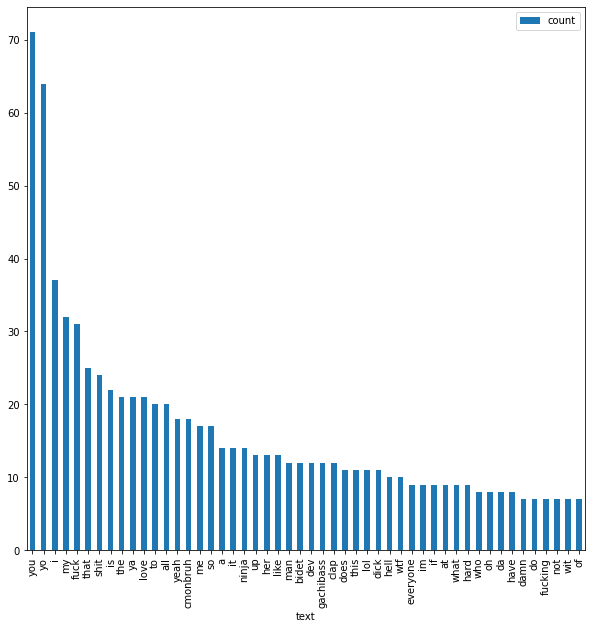

In [ ]:
top20 = wordsWR.head(50)
top20.plot.bar(x="text",y="count",figsize=(10,10))

### NR stands for no rules

In [ ]:
dfNR = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DATASCI/project/norules.csv')
dfNR.tail()

Unnamed: 0               text  ... offensive_language   neither
9995        9995               !res  ...           0.330376  0.630171
9996        9996                vac  ...           0.330376  0.630171
9997        9997           DansGame  ...           0.330376  0.630171
9998        9998  @Karnage_105 SLAY  ...           0.330376  0.630171
9999        9999               Why?  ...           0.368591  0.614641

[5 rows x 6 columns]

In [ ]:
dfNR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   text                10000 non-null  object 
 2   top_class           10000 non-null  object 
 3   hate_speech         10000 non-null  float64
 4   offensive_language  10000 non-null  float64
 5   neither             10000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 468.9+ KB


In [ ]:
#Drop unecessary columns
dfNR =dfNR.drop(["Unnamed: 0","hate_speech", "offensive_language", "neither"], axis=1)
#Make top_class binary as toxic(1) or not toxic(0)
dfNR['toxic'] = dfNR['top_class'].apply(lambda x: change_label(x))
#convert text to string type
dfNR['text'] = dfNR['text'].astype(str)

### Toxic Chats in streamers who does not impose rules

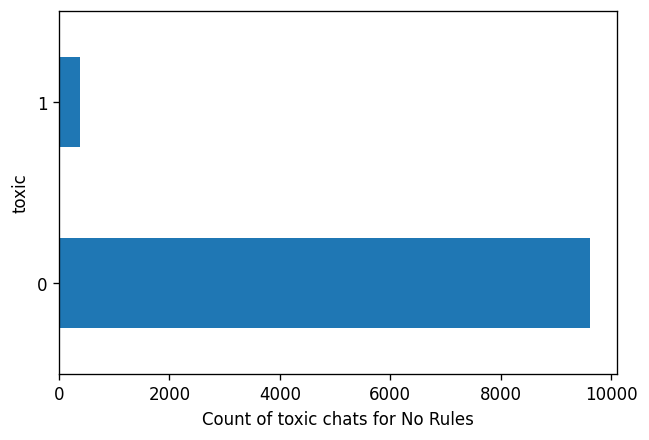

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
dfNR.groupby('toxic')['toxic'].count().plot(kind='barh', ax=ax)
ax.set_xlabel('Count of toxic chats for No Rules');

In [ ]:
dfNR['text']=dfNR['text'].apply(lambda x: lower_case(x))
dfNR.tail()

text top_class  toxic
9995               !res   neither      0
9996                vac   neither      0
9997           dansgame   neither      0
9998  @karnage_105 slay   neither      0
9999               why?   neither      0

In [ ]:
# Initialize Spacy Model
nlp = spacy.load("en_core_web_sm")
# Parse the text using the Spacy model
dfNR['text'] = dfNR['text'].apply(lambda comment: nlp(comment))

In [ ]:
dfNR.tail()

text top_class  toxic
9995                          (it, will, not, load, up)   neither      0
9996                                               (yo)   neither      0
9997  (maybe, you, have, to, exit, to, get, the, upd...   neither      0
9998                              (what, is, happening)   neither      0
9999                                              (...)   neither      0

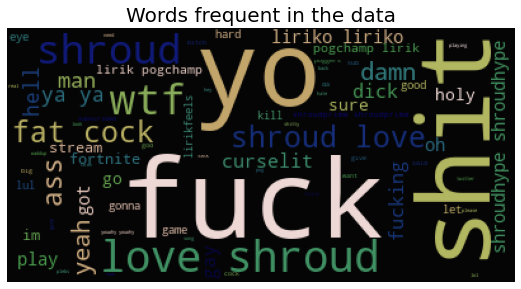

In [ ]:
subset=dfNR[dfNR['toxic']==1]
text = subset.text.values
wordcloud = WordCloud().generate(' '.join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [ ]:
subsetNR=dfNR[dfNR['toxic']==1]
textNR=subsetNR['text'].values
textNR = ' '.join([str(elem) for elem in text])
#remove non words such as punctuation
textNR=re.sub(pattern = "[^\w\s]", repl = "", string = textNR)
#remove emotes
textNR=re.sub(pattern = "(shroud)\w*", repl = "", string = textNR)
textNR=re.sub(pattern = "(pog)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(twitch)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(vote)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(courage)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(sean)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(high)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(beat)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(tat)\w+", repl = "", string = textNR)
textNR=re.sub(pattern = "(ninja)", repl = "", string = textNR)



textNR=re.sub(pattern = "(\s\s+)", repl = " ", string = textNR)
textNR

'thanks nightbot ya dick your plays give me hard ons so beautiful one shit lul what the fuck okie catch ya later chat lupolove thats all ahh man my elo is ass as is fuckin sick vislaud book with ass fuck waffle hell my immersion wtf da da daaaaaaa get high as fuck and then watch it fuck yea free shit ass kreygasm vislaud fuck shorty im a chicken got ya beef jerky all good you do you lirik o shit waddup da oh shit holy shit the admin is a complete retard damn those thingies lirikn damn them to hell yo be you lirik be you lirik be you lirik be you lirik be you lirik be you lirik lul fuck no fuck us all id let her fuck me up tbh her eyes are amazing d humans are shitty people lirik 201 hard lirikfeels lirikfeels lirikfeels lirikfeels yeah choose x you fuck not o lirik you should get into one piece again just checked nyc rents holy jesus fucking christ wtf oh shit zetless who lol wtf oh fuck tht was shit vixing you should gift owowww angel is a hoe no shit 67hours of sim city holy fuck tha

In [ ]:
wordsNR=textNR.split(' ')
wordsNR=dict(Counter(wordsNR))
wordsNR=pd.DataFrame.from_dict(wordsNR, orient='index').reset_index()
wordsNR.columns=['text','count']
wordsNR =wordsNR.sort_values(by=['count'],ascending=False)
wordsNR

text  count
60         you     96
150          i     48
17        fuck     39
76          yo     35
13        shit     33
..         ...    ...
264       cant      1
263  seemsgood      1
262      fucks      1
257       weak      1
578  crosshair      1

[579 rows x 2 columns]

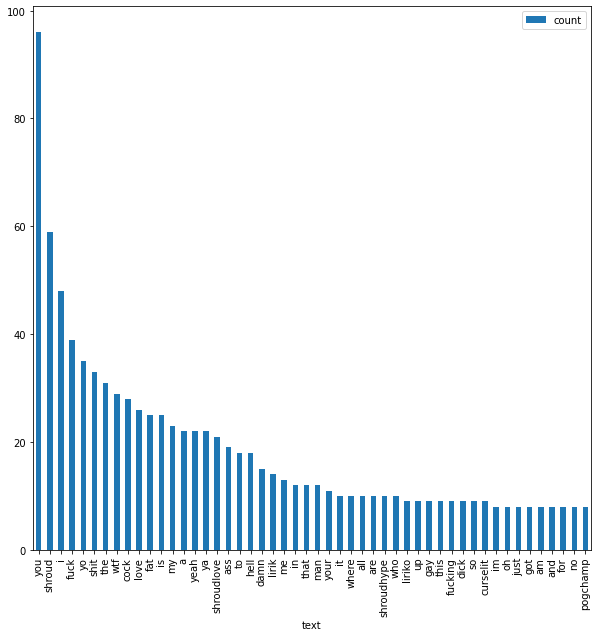

In [ ]:
top50 = wordsNR.head(50)
top50.plot.bar(x="text",y="count",figsize=(10,10))

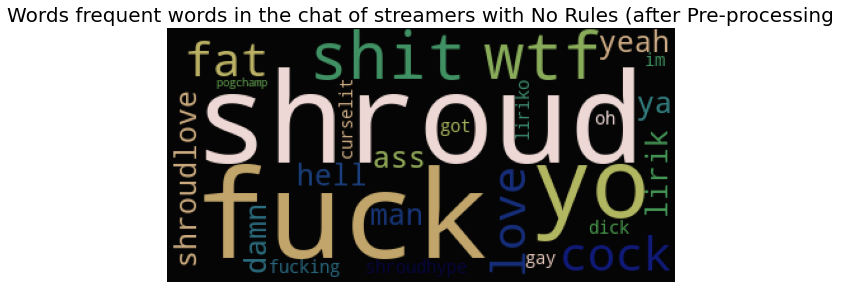

In [ ]:
textNR = top50.text.values
wordcloud = WordCloud().generate(' '.join(textNR))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequent words in the chat of streamers with No Rules (after Pre-processing", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [ ]:
subsetNR=dfNR[dfNR['toxic']==1]
bot50 = wordsNR[wordsNR['count']<=4]
bot50 = bot50[bot50['count']>=2]
bot50

text  count
328           god      4
509    subscribed      4
329            if      4
433            at      4
97            not      4
..            ...    ...
363          cumm      2
129          made      2
314           btw      2
258         pussy      2
405  hexkalhexlul      2

[116 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12541 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65417 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12541 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65417 missing from current font.
  font.set_text(s, 0, flags=flags)


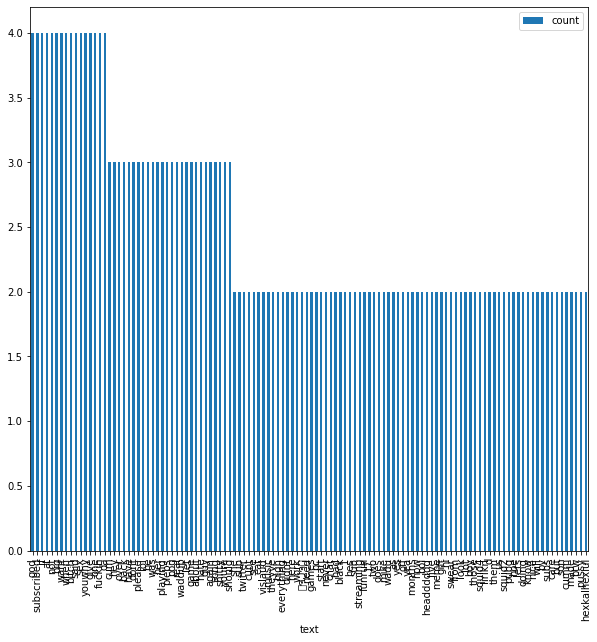

In [ ]:
bot50.plot.bar(x="text",y="count",figsize=(10,10))


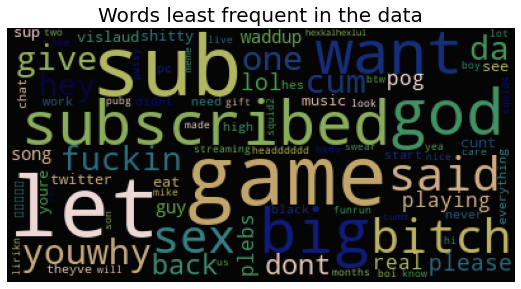

In [ ]:
textNR = bot50.text.values
wordcloud = WordCloud().generate(' '.join(textNR))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words least frequent in the data", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)